In [11]:
from utils import show_digit, read_data, validate_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandera as pa
import janitor

In [12]:
train_df = read_data('data/train.csv')
test_df = read_data('data/test.csv')

In [14]:
train_df

<function utils.validate_data(df)>

In [16]:
schema_columns = {
    'label': pa.Column(int, checks=pa.Check.in_range(0,9))
}

for i in range(784):
    schema_columns[f"pixel{i}"] = pa.Column(int, checks=pa.Check.in_range(0, 255))

schema = pa.DataFrameSchema(schema_columns)
print(schema.columns['pixel0'])


<Schema Column(name=pixel0, type=DataType(int64))>


In [17]:
try:
    validated_data = schema.validate(train_df)
    print("Data validation passed")
except pa.errors.SchemaError as e:
    print(f"Data Validation failed: \n{e}")

Data validation passed


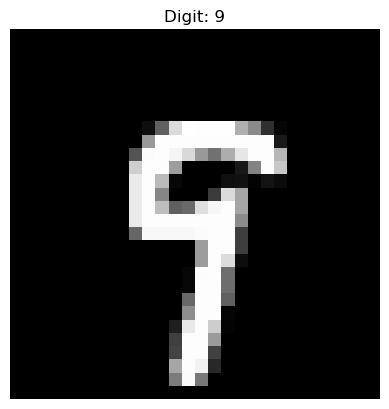

In [5]:
show_digit(train_df, 210)